### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [2]:
df.tail()

,Date/Time,Lat,Lon,Base
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764
829274,8/31/2014 23:59:00,40.7270,-73.9802,B02764


In [4]:
df

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [12]:
df.sample(5)

,Date/Time,Lat,Lon,Base,Date
601181,2014-08-31 13:16:00,40.7147,-73.9494,B02617,2014-08-31
418583,2014-08-14 18:38:00,40.7277,-74.0071,B02617,2014-08-14
75128,2014-08-06 17:38:00,40.7248,-73.9815,B02598,2014-08-06
236331,2014-08-29 13:48:00,40.7257,-73.9848,B02598,2014-08-29
717473,2014-08-20 02:58:00,40.7629,-73.9833,B02682,2014-08-20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  829275 non-null  datetime64[ns]
 1   Lat        829275 non-null  float64       
 2   Lon        829275 non-null  float64       
 3   Base       829275 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 25.3+ MB


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [72]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time']=pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
df['Date']=df['Date/Time'].dt.date
df_grouped=df.groupby('Date').count()

# Find the date with the highest number of pickups
df_grouped.sort_values(by='Base',ascending=False).index[0]

#below is alternate to gorup by fucntion to achive the same result as above 
#df.Date.value_counts().sort_values(ascending=False).index[0]

datetime.date(2014, 8, 7)

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [76]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
df_highest_pickups=df[df.Date==df.Date.value_counts().sort_values(ascending=False).index[0]]


# Get the count of pickups on the highest date

df_highest_pickups.shape[0]


32759

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [78]:
# Count the number of unique TLC base companies

df.Base.nunique()


5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [80]:
# Group by TLC base company and count the number of pickups

df.groupby('Base').count().sort_values(by='Date', ascending=False)
# Find the TLC base company with the highest number of pickups
df.groupby('Base').count().sort_values(by='Date', ascending=False).head(1).index[0]



'B02617'

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [81]:
# Group by TLC base company and count the number of pickups

df.Base.value_counts()

B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [85]:
# Extract the hour from the 'Date/Time' column
df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
df['Hour']=df['Date/Time'].dt.hour
df['Hour'].value_counts()

# Find the hour with the highest number of pickups
df['Hour'].value_counts().sort_values(ascending=False).index[0]



17

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

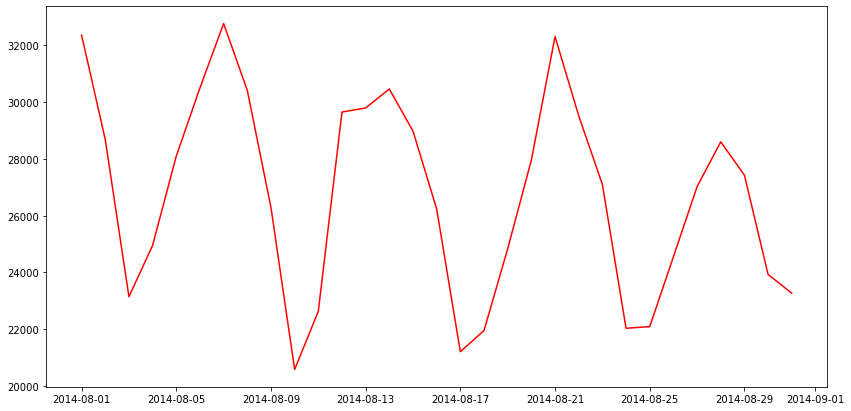

In [88]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups

df.Date.value_counts().sort_index()
# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(14,7))
df.Date.value_counts().sort_index().plot(kind='line',color='red')
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

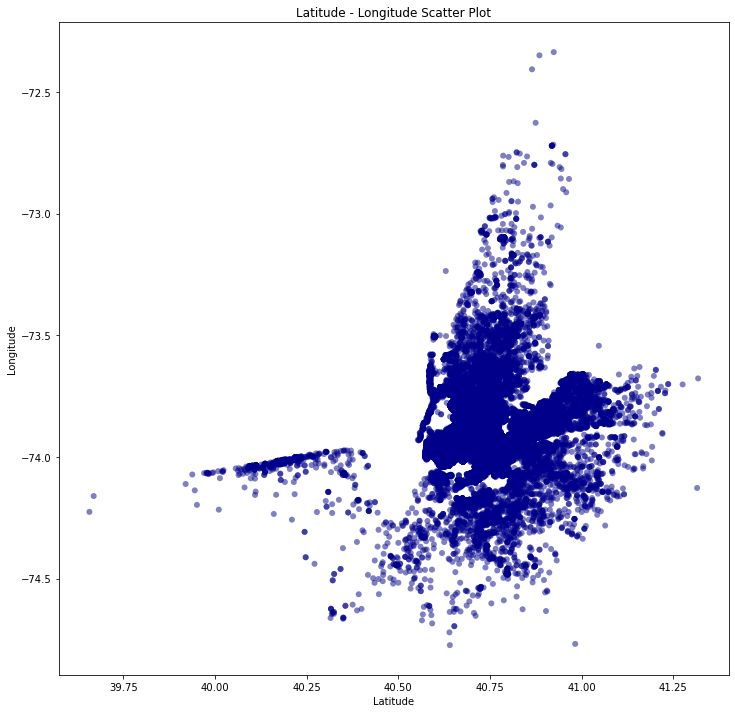

In [90]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
import seaborn as sns
plt.figure(figsize=(12,12))
sns.scatterplot(x='Lat',y='Lon',data=df,edgecolor='None',alpha=0.5,color='darkblue')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude - Longitude Scatter Plot')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

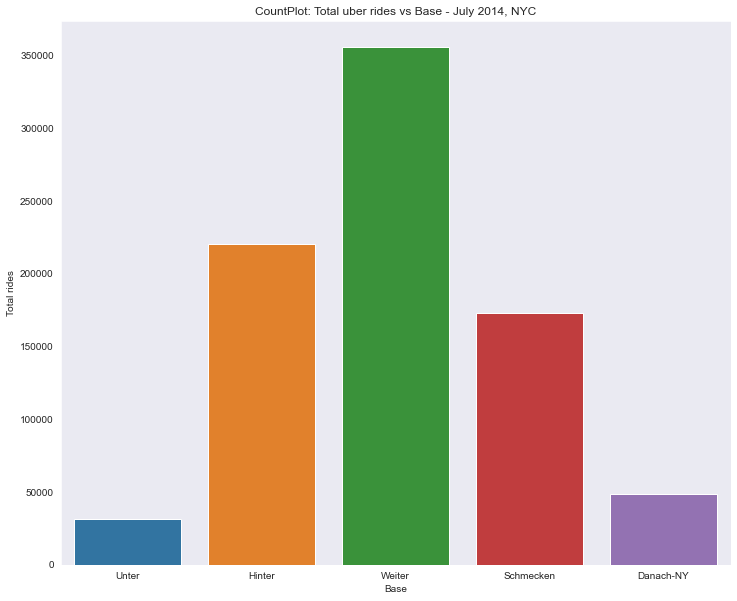

In [91]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
BaseMapper={'B02512' : 'Unter', 'B02598' : 'Hinter', 'B02617' : 'Weiter', 'B02682' : 'Schmecken','B02764' : 'Danach-NY'}

#Count plot of Base
plt.figure(figsize=(12,10))
sns.set_style("dark")
sns.countplot(x=df['Base'].map(BaseMapper))
plt.ylabel('Total rides')
plt.title('CountPlot: Total uber rides vs Base - July 2014, NYC')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

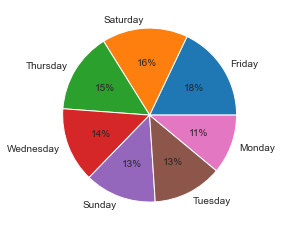

In [102]:
# Group by day of the week and count the number of pickups

DayMap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day'] = df['Date/Time'].dt.weekday.map(DayMap)
df.Day.value_counts()
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
#df.Day.value_counts(normalize=True).plot(kind='pie')
plt.pie(df['Day'].value_counts(),labels=(df['Day'].value_counts(normalize=True)*100).index, autopct='%.0f%%')
plt.show()